In [4]:
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\program files\python39\python.exe -m pip install --upgrade pip' command.


In [163]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.cluster.hierarchy import linkage, dendrogram,fcluster
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [44]:
# Load data
df = pd.read_excel("data.xlsx",sheet_name="2022",index_col = "Наименование")

In [45]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [46]:
df["Доходы консолидированных бюджетов субъектов Российской Федерации (млн)"].replace(
                                regex={',': '.'," ":"",'–':0},inplace=True)

In [47]:
df_filtered = pd.DataFrame({"X1":df["Число дорожно-транспортных происшествий и пострадавших в них на 100 000 человек населения"],
                            "X2":df["Смертность населения старше трудоспособного возраста, на 100 000 человек населения соответствующего возраста"],
                           "X3":df["Продажа сильно алкогольной продукции населению(тысяч декалитров)"].div(df["Численность населения, тыс. человек"]),
                            "X4":df["Стоимость минимального (условного) набора потребительских товаров и услуг"].astype(float),
                            "X5":df["Число спортивных сооружений"].div(df["Численность населения, тыс. человек"]),
                            "X6":df["Доходы консолидированных бюджетов субъектов Российской Федерации (млн)"].astype(float).div(df["Численность населения, тыс. человек"]),
                            "X7":df["Предварительно расследовано преступлений, совершенных в состоянии алкогольного опьянения"].div(df["Численность населения, тыс. человек"]),
                            "X8":df["Среднедушевые доходы населения (в месяц), руб."],
                            "X9":df["Численность студентов, обучающихся по программам бакалавриата, специалитета, магистратуры на 10 000 человек населения, всего"].astype(float)
                           })

In [48]:
df_filtered

,X1,X2,X3,X4,X5,X6,X7,X8,X9
Наименование,,,,,,,,,
Алтайский край,107.2,610.1,0.549898,112.0,2.336509,0.004867,3.361268,26010,243.0
Амурская область,150.2,769.2,1.013971,109.5,2.491170,0.131129,3.414995,39626,194.0
Архангельская область без автономного округа,76.1,629.2,1.325179,108.4,1.947488,0.078067,3.030572,37810,180.0
Астраханская область,97.9,489.8,0.543408,109.0,1.411707,0.043660,1.775376,26833,294.0
Белгородская область,68.8,487.3,0.521666,108.6,2.850876,0.033237,1.204854,35612,311.0
...,...,...,...,...,...,...,...,...,...
Чеченская Республика,12.9,181.4,0.011156,110.3,1.221204,0.028307,0.102369,26397,231.0
Чувашская Республика — Чувашия,83.8,588.7,0.935477,110.0,2.816189,0.031015,1.914228,23619,299.0
Чукотский автономный округ,35.5,820.0,1.301360,110.6,1.566645,7.996818,5.075930,99905,20.0


In [49]:
df_filtered.dtypes

X1    float64
X2    float64
X3    float64
X4    float64
X5    float64
X6    float64
X7    float64
X8      int64
X9    float64
dtype: object

In [50]:
df_filtered["X6"] - df_filtered["X6"].mean(axis=0)/df_filtered["X6"]

Наименование
Алтайский край                                 -60.516068
Амурская область                                -2.115225
Архангельская область без автономного округа    -3.695124
Астраханская область                            -6.703025
Белгородская область                            -8.829254
                                                  ...    
Чеченская Республика                           -10.377874
Чувашская Республика — Чувашия                  -9.466314
Чукотский автономный округ                       7.959983
Ямало-Ненецкий автономный округ                 -0.024526
Ярославская область                             -6.715452
Name: X6, Length: 85, dtype: float64

In [51]:
for col in df_filtered.columns:
    sdf[col] = (df_filtered[col] - df_filtered[col].mean(axis=0))/df_filtered[col].std()

In [52]:
sdf["Наименование"] = df_filtered.index

In [53]:
sdf.set_index("Наименование",inplace=True)

In [54]:
sdf

,X1,X2,X3,X4,X5,X6,X7,X8,X9
Наименование,,,,,,,,,
Алтайский край,0.423721,0.439726,-0.646954,1.676521,0.920458,-0.216255,0.922800,-0.626353,0.089137
Амурская область,1.932733,1.687317,0.722511,0.050502,1.192731,-0.122002,0.966786,0.206284,-0.368074
Архангельская область без автономного округа,-0.667681,0.589500,1.640880,-0.664946,0.235605,-0.161612,0.652055,0.095233,-0.498706
Астраханская область,0.097353,-0.503612,-0.666108,-0.274702,-0.707612,-0.187296,-0.375588,-0.576026,0.565010
Белгородская область,-0.923862,-0.523216,-0.730266,-0.534865,1.825977,-0.195077,-0.842681,-0.039178,0.723634
...,...,...,...,...,...,...,...,...,...
Чеченская Республика,-2.885578,-2.921945,-2.236771,0.570828,-1.042984,-0.198758,-1.745298,-0.602688,-0.022833
Чувашская Республика — Чувашия,-0.397463,0.271917,0.490879,0.375706,1.764913,-0.196736,-0.261909,-0.772566,0.611664
Чукотский автономный округ,-2.092469,2.085667,1.570590,0.765950,-0.434851,5.749655,2.326612,3.892426,-1.991640


In [56]:
sdf["X6"] = [-0.832256599,
0.517564476,
0.155036569,
-0.359749214,
-0.222913948,
-0.403474737,
-0.406735079,
-0.492329036,
-0.282278512,
-0.386556673,
0.73188267,
0.434812446,
1.34589173,
-0.388519731,
-0.653255706,
-0.543854591,
-0.291236648,
-0.267983437,
2.0575036,
-0.322220544,
0.041703624,
-0.321621748,
-0.316242875,
-0.420316319,
-0.525390417,
-0.326985368,
-0.324499661,
-0.277539357,
-0.373201267,
2.0997129,
-0.188240646,
0.293967434,
4.95772489,
-0.309071346,
-0.260027907,
-0.339015896,
-0.0558568362,
-0.34632205,
-0.326353313,
-0.394927281,
-0.270026224,
-0.191349951,
-0.280892029,
-0.490077504,
0.140997861,
-0.419513275,
0.232711785,
-0.583393156,
-0.392435482,
-0.408194646,
-0.117387142,
0.298226211,
-0.990065046,
-0.430188766,
-0.27650776,
-0.17593093,
-0.450680697,
-0.202190013,
1.34630413,
-0.393110994,
-0.427326287,
-0.34977747,
-0.249657056,
0.131735835,
-0.491780111,
-0.990065046,
-0.2559698,
-0.990065046,
-0.356003993,
-0.509813052,
-0.305180798,
-0.275965286,
0.87357587,
-0.345618213,
0.211570693,
-0.351707674,
-0.460731175,
0.263057386,
0.713163046,
-0.40467678,
-0.337396802,
-0.43700844,
4.80229078,
3.11894892,
-0.198719471]

In [58]:
sdf

,X1,X2,X3,X4,X5,X6,X7,X8,X9
Наименование,,,,,,,,,
Алтайский край,0.423721,0.439726,-0.646954,1.676521,0.920458,-0.832257,0.922800,-0.626353,0.089137
Амурская область,1.932733,1.687317,0.722511,0.050502,1.192731,0.517564,0.966786,0.206284,-0.368074
Архангельская область без автономного округа,-0.667681,0.589500,1.640880,-0.664946,0.235605,0.155037,0.652055,0.095233,-0.498706
Астраханская область,0.097353,-0.503612,-0.666108,-0.274702,-0.707612,-0.359749,-0.375588,-0.576026,0.565010
Белгородская область,-0.923862,-0.523216,-0.730266,-0.534865,1.825977,-0.222914,-0.842681,-0.039178,0.723634
...,...,...,...,...,...,...,...,...,...
Чеченская Республика,-2.885578,-2.921945,-2.236771,0.570828,-1.042984,-0.337397,-1.745298,-0.602688,-0.022833
Чувашская Республика — Чувашия,-0.397463,0.271917,0.490879,0.375706,1.764913,-0.437008,-0.261909,-0.772566,0.611664
Чукотский автономный округ,-2.092469,2.085667,1.570590,0.765950,-0.434851,4.802291,2.326612,3.892426,-1.991640


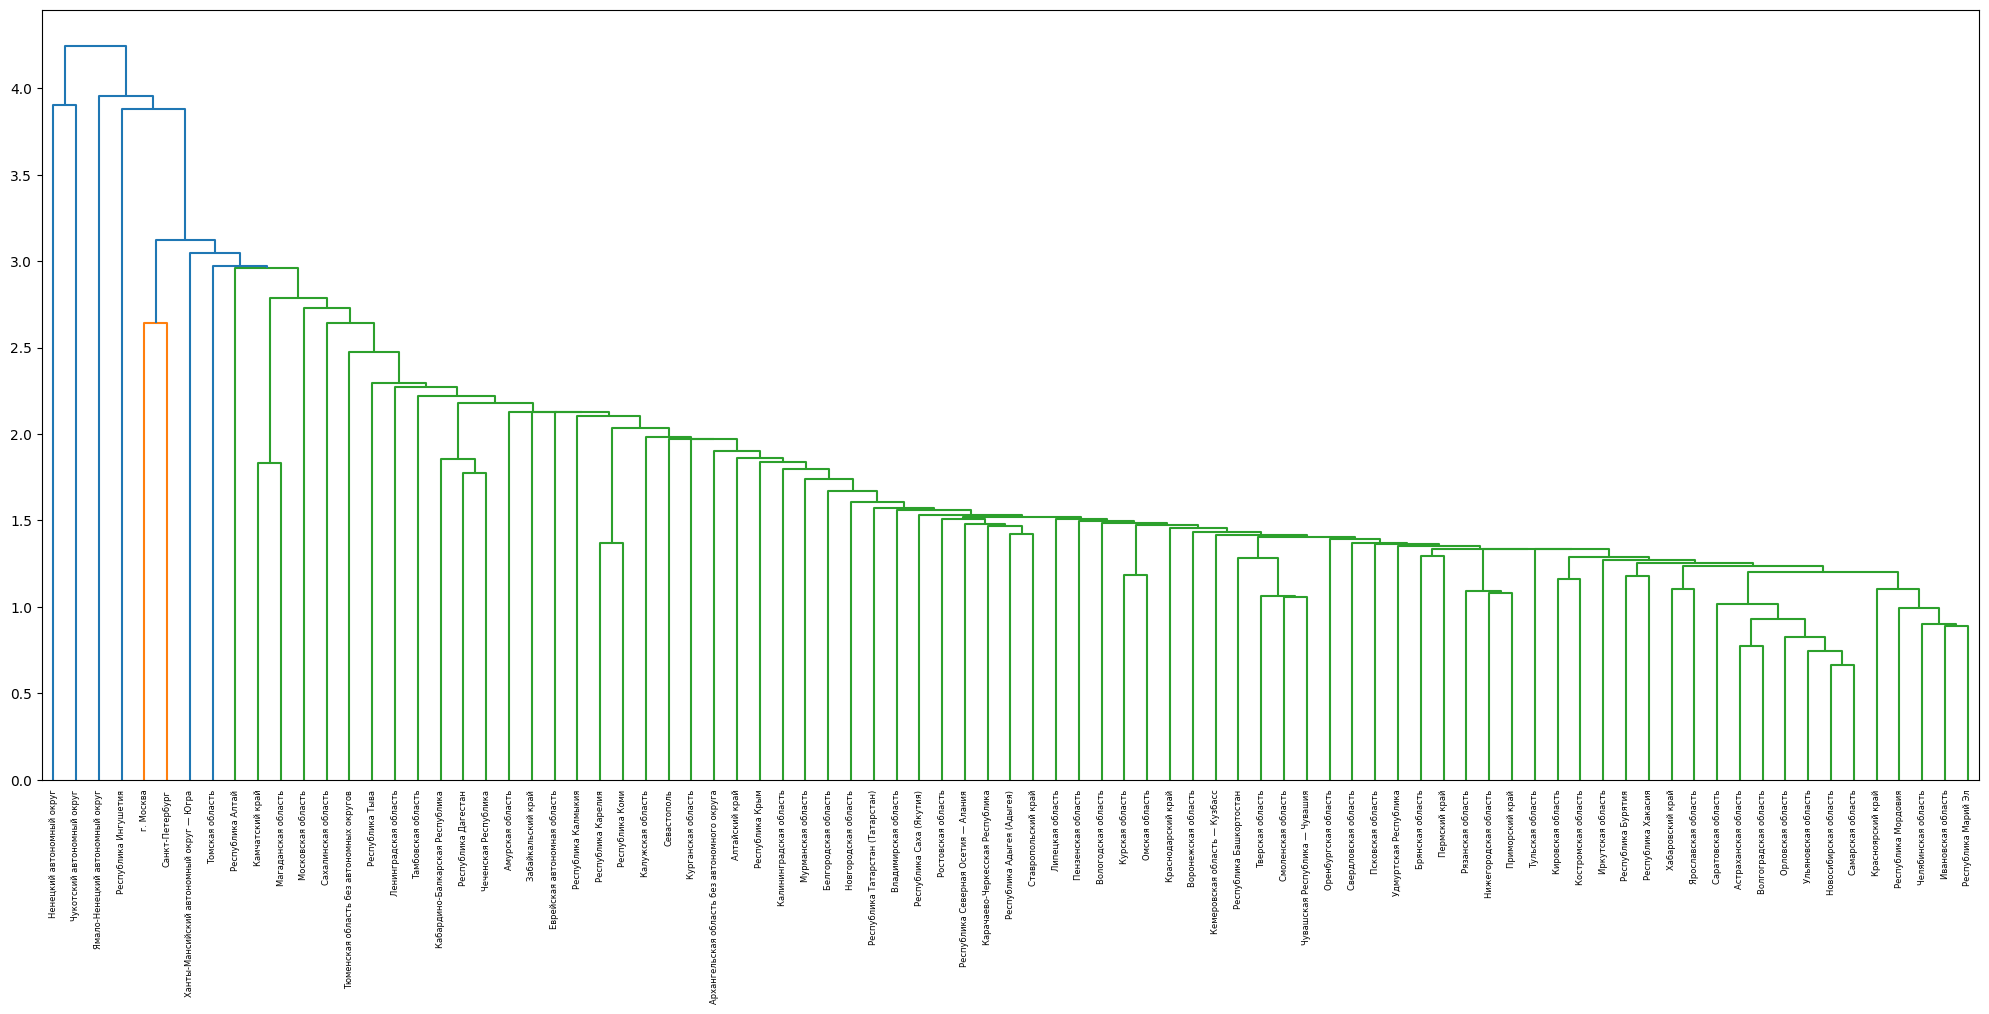

single
['Ненецкий автономный округ']
['Чукотский автономный округ']
['г. Москва', 'Санкт-Петербург']
['Алтайский край', 'Амурская область', 'Архангельская область без автономного округа', 'Астраханская область', 'Белгородская область', 'Брянская область', 'Владимирская область', 'Волгоградская область', 'Вологодская область', 'Воронежская область', 'Еврейская автономная область', 'Забайкальский край', 'Ивановская область', 'Иркутская область', 'Кабардино-Балкарская Республика', 'Калининградская область', 'Калужская область', 'Камчатский край', 'Карачаево-Черкесская Республика', 'Кемеровская область — Кузбасс', 'Кировская область', 'Костромская область', 'Краснодарский край', 'Красноярский край', 'Курганская область', 'Курская область', 'Ленинградская область', 'Липецкая область', 'Магаданская область', 'Московская область', 'Мурманская область', 'Нижегородская область', 'Новгородская область', 'Новосибирская область', 'Омская область', 'Оренбургская область', 'Орловская область', 'Пенз

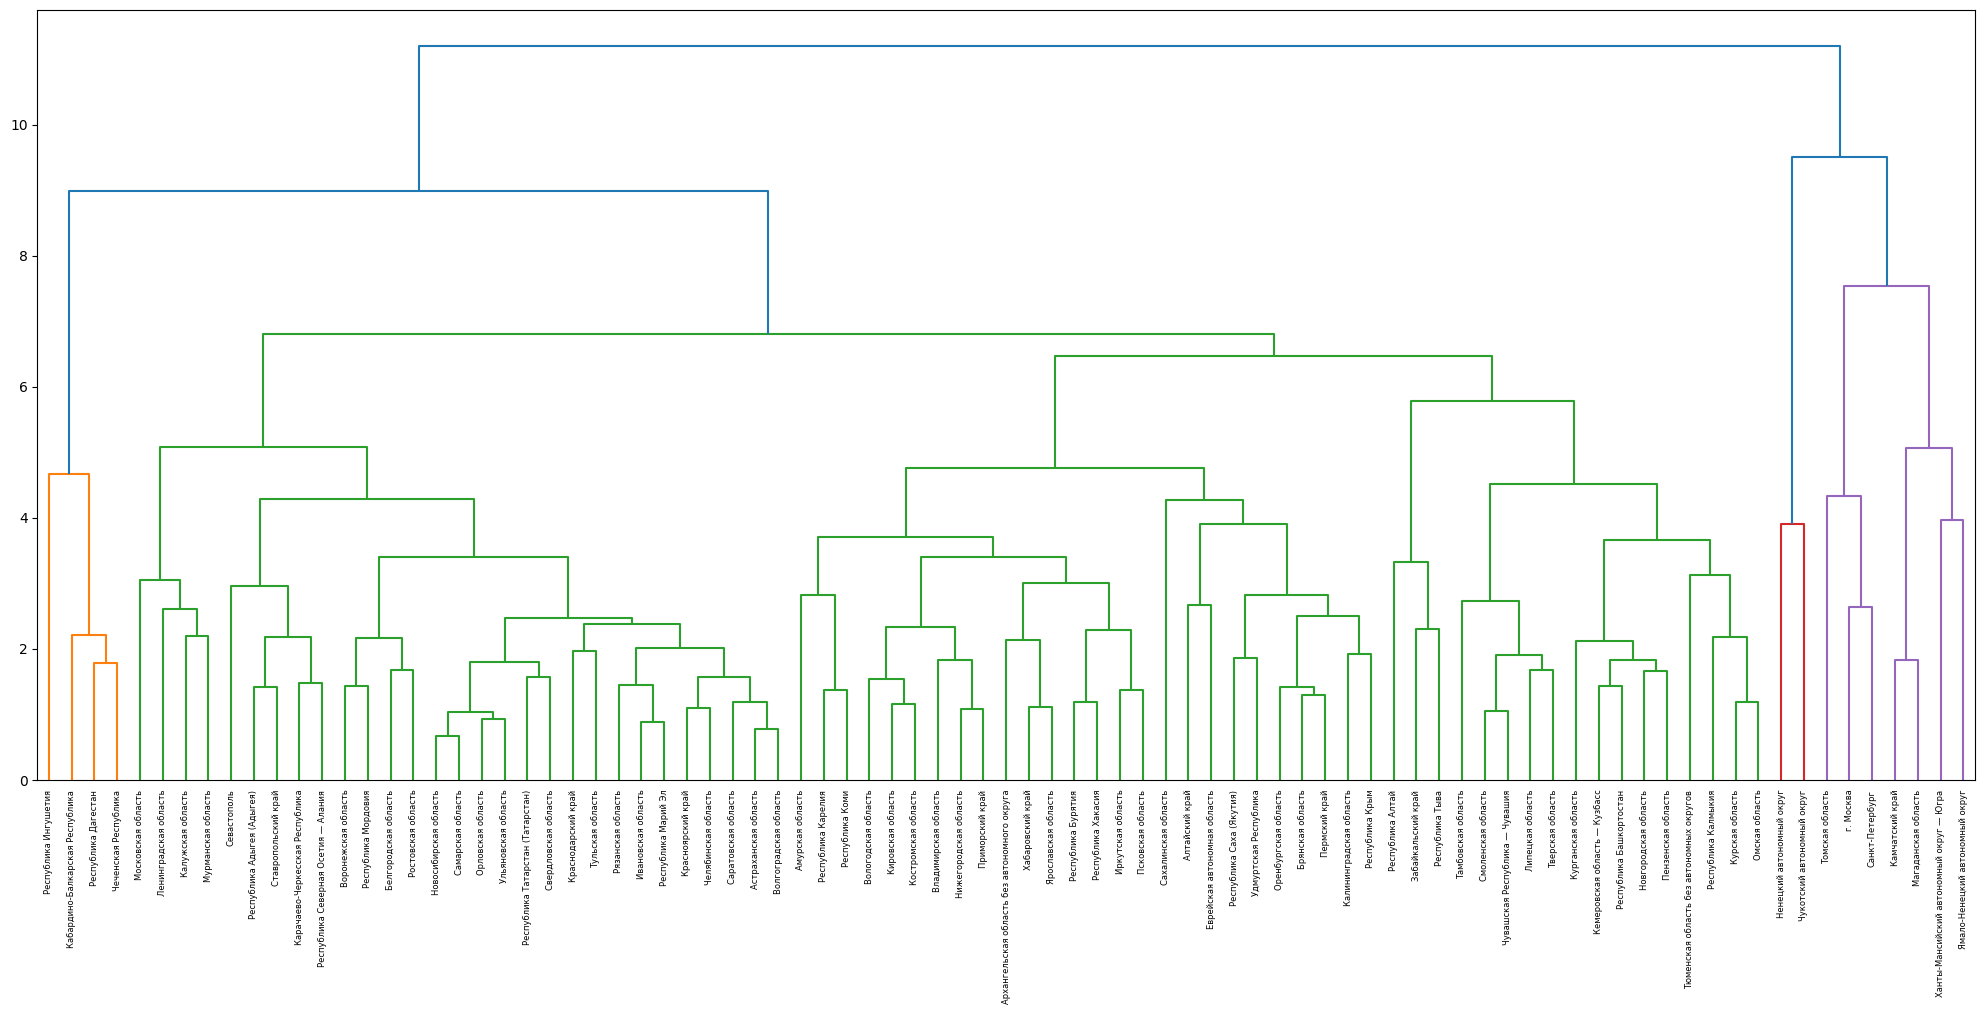

complete
['Кабардино-Балкарская Республика', 'Республика Дагестан', 'Республика Ингушетия', 'Чеченская Республика']
['Астраханская область', 'Белгородская область', 'Волгоградская область', 'Воронежская область', 'Ивановская область', 'Калужская область', 'Карачаево-Черкесская Республика', 'Краснодарский край', 'Красноярский край', 'Ленинградская область', 'Московская область', 'Мурманская область', 'Новосибирская область', 'Орловская область', 'Республика Адыгея (Адыгея)', 'Республика Марий Эл', 'Республика Мордовия', 'Республика Северная Осетия — Алания', 'Республика Татарстан (Татарстан)', 'Ростовская область', 'Рязанская область', 'Самарская область', 'Саратовская область', 'Свердловская область', 'Севастополь', 'Ставропольский край', 'Тульская область', 'Ульяновская область', 'Челябинская область']
['Алтайский край', 'Амурская область', 'Архангельская область без автономного округа', 'Брянская область', 'Владимирская область', 'Вологодская область', 'Еврейская автономная область',

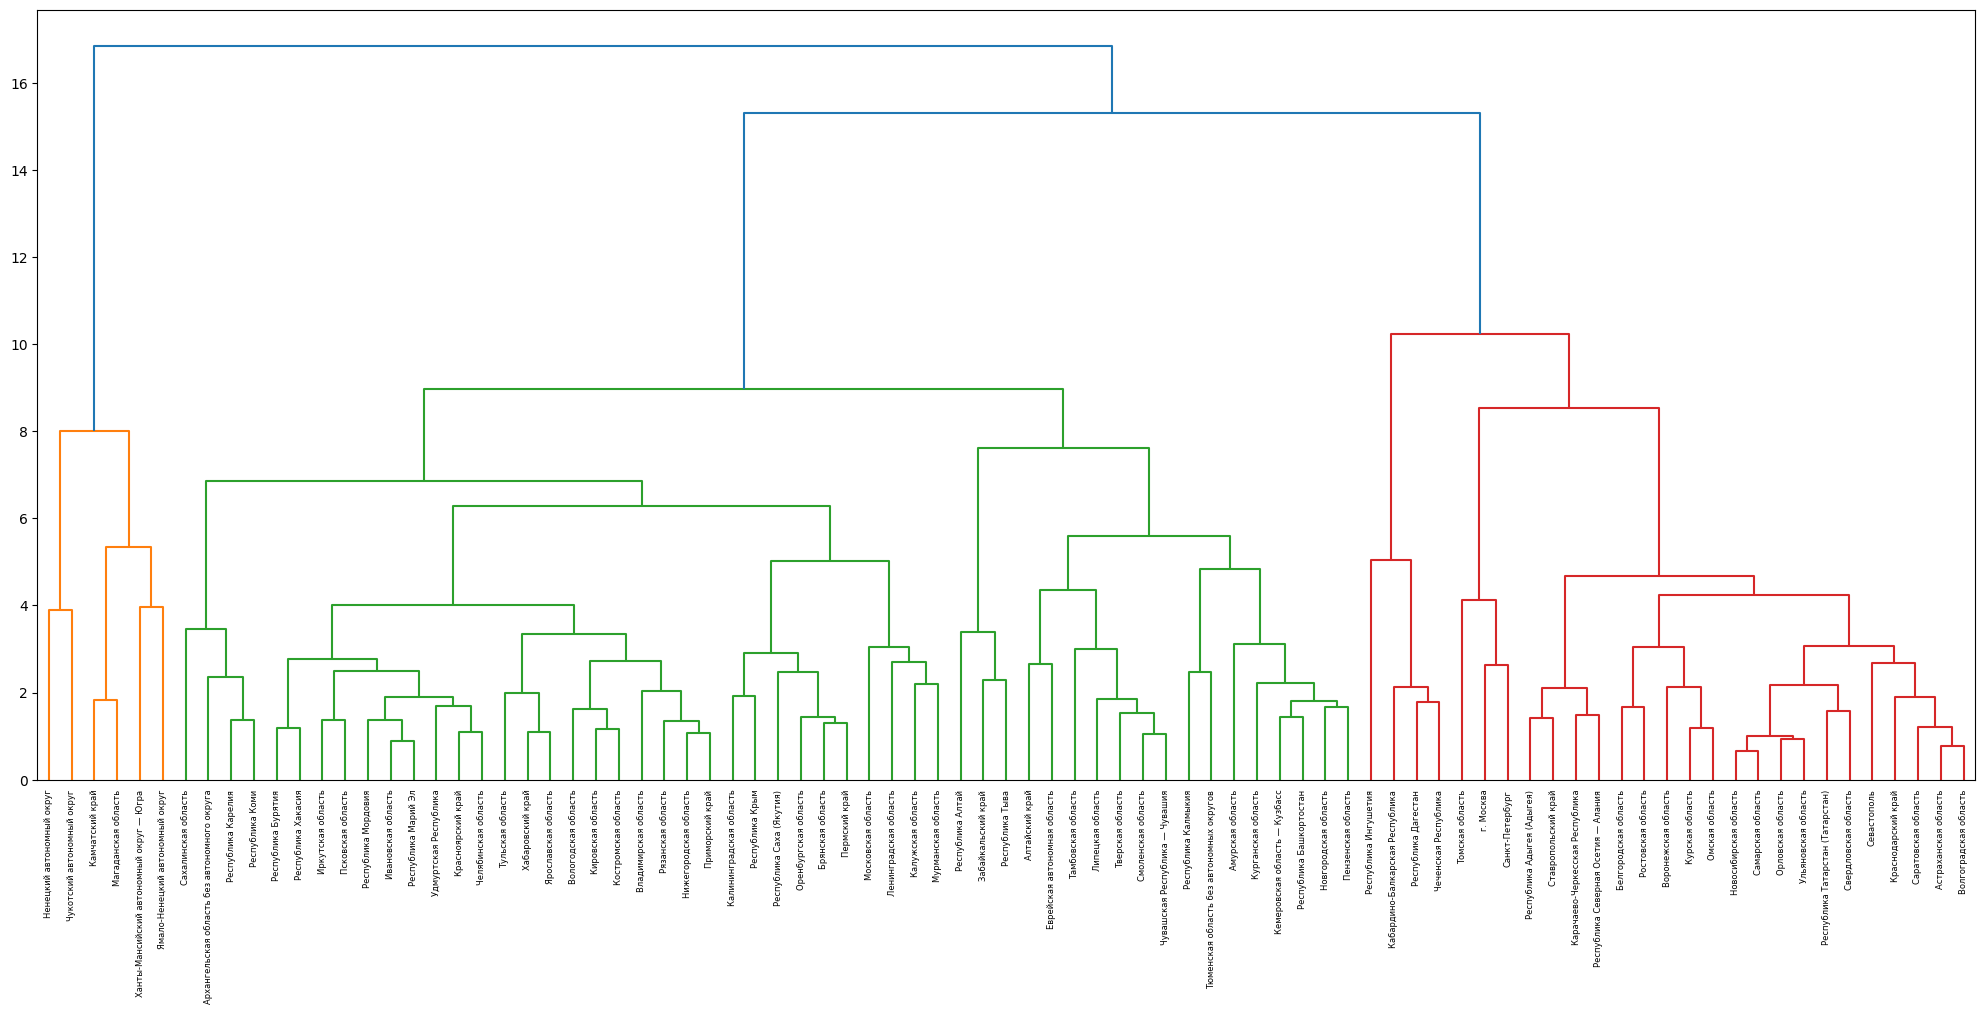

ward
['Камчатский край', 'Магаданская область', 'Ненецкий автономный округ', 'Ханты-Мансийский автономный округ — Югра', 'Чукотский автономный округ', 'Ямало-Ненецкий автономный округ']
['Архангельская область без автономного округа', 'Брянская область', 'Владимирская область', 'Вологодская область', 'Ивановская область', 'Иркутская область', 'Калининградская область', 'Калужская область', 'Кировская область', 'Костромская область', 'Красноярский край', 'Ленинградская область', 'Московская область', 'Мурманская область', 'Нижегородская область', 'Оренбургская область', 'Пермский край', 'Приморский край', 'Псковская область', 'Республика Бурятия', 'Республика Карелия', 'Республика Коми', 'Республика Крым', 'Республика Марий Эл', 'Республика Мордовия', 'Республика Саха (Якутия)', 'Республика Хакасия', 'Рязанская область', 'Сахалинская область', 'Тульская область', 'Удмуртская Республика', 'Хабаровский край', 'Челябинская область', 'Ярославская область']
['Алтайский край', 'Амурская облас

In [208]:
def occurrences(s, lst):
    #print(s,lst)
    r = []
    for i in range (0, len(lst)):
        if(lst[i]==s):
            r.append(i)
    return r

def get_obj_names(clustering:list, labels:list) -> list:
    Max_classes = max(clustering)
    res = [[] for i in range(Max_classes+1)]
    for i in range(0,Max_classes+1):
        t = occurrences(i,clustering)
        #print(t)
        for reg in t:
            res[i].append(labels[reg])
    return res
        


method = ["single","complete","ward"]
treshhold = [7,7,5]
r = dict()
for m in range (0,len(method)):
    Z = linkage(sdf,method[m])
    fig = plt.figure(figsize=(25, 10))
    dn = dendrogram(Z,labels=sdf.index)
    plt.show()
    clusters = fcluster(Z,treshhold[m], criterion='maxclust')
    print(f"{method[m]}")
    r[method[m]]=get_obj_names(clusters,sdf.index.tolist())[1:]
    for cl in get_obj_names(clusters,sdf.index.tolist())[1:]:
        print(f"{cl}", end="\n")

In [209]:
r

{'single': [['Ненецкий автономный округ'],
  ['Чукотский автономный округ'],
  ['г. Москва', 'Санкт-Петербург'],
  ['Алтайский край',
   'Амурская область',
   'Архангельская область без автономного округа',
   'Астраханская область',
   'Белгородская область',
   'Брянская область',
   'Владимирская область',
   'Волгоградская область',
   'Вологодская область',
   'Воронежская область',
   'Еврейская автономная область',
   'Забайкальский край',
   'Ивановская область',
   'Иркутская область',
   'Кабардино-Балкарская Республика',
   'Калининградская область',
   'Калужская область',
   'Камчатский край',
   'Карачаево-Черкесская Республика',
   'Кемеровская область — Кузбасс',
   'Кировская область',
   'Костромская область',
   'Краснодарский край',
   'Красноярский край',
   'Курганская область',
   'Курская область',
   'Ленинградская область',
   'Липецкая область',
   'Магаданская область',
   'Московская область',
   'Мурманская область',
   'Нижегородская область',
   'Новгор

In [210]:
r["single"]

[['Ненецкий автономный округ'],
 ['Чукотский автономный округ'],
 ['г. Москва', 'Санкт-Петербург'],
 ['Алтайский край',
  'Амурская область',
  'Архангельская область без автономного округа',
  'Астраханская область',
  'Белгородская область',
  'Брянская область',
  'Владимирская область',
  'Волгоградская область',
  'Вологодская область',
  'Воронежская область',
  'Еврейская автономная область',
  'Забайкальский край',
  'Ивановская область',
  'Иркутская область',
  'Кабардино-Балкарская Республика',
  'Калининградская область',
  'Калужская область',
  'Камчатский край',
  'Карачаево-Черкесская Республика',
  'Кемеровская область — Кузбасс',
  'Кировская область',
  'Костромская область',
  'Краснодарский край',
  'Красноярский край',
  'Курганская область',
  'Курская область',
  'Ленинградская область',
  'Липецкая область',
  'Магаданская область',
  'Московская область',
  'Мурманская область',
  'Нижегородская область',
  'Новгородская область',
  'Новосибирская область',
  

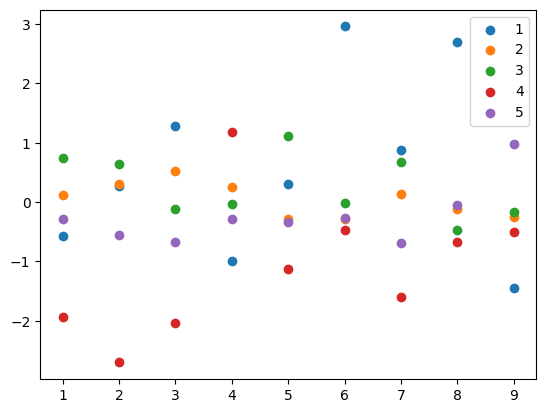

In [211]:
means = {"ward":list(),"complete":list(),"single":list(),"kmeans":list()}

for m in method:
    for cl in r[m]:
        #print(cl)
        data =sdf[sdf.index.isin(cl)].mean().tolist()
        means[m].append(data)
        #print(means)
        
i =0
for c in means["ward"]:
    i+=1
    plt.scatter([range(1,10)],c,label=str(i))
    plt.legend()
    #print(c)

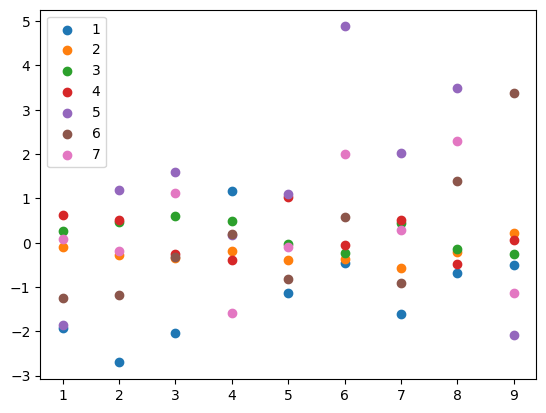

In [212]:
i =0
for c in means["complete"]:
    i+=1
    plt.scatter([range(1,10)],c,label=str(i))
    plt.legend()
    #print(c)

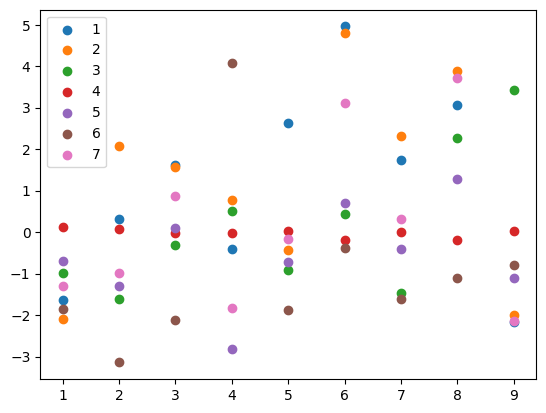

In [213]:
i =0
for c in means["single"]:
    i+=1
    plt.scatter([range(1,10)],c,label=str(i))
    plt.legend()
    #print(c)

In [214]:
def QF(center, data):
    s = 0
    for point in data:
        s+= sum((a-b)**2 for a,b in zip(center,point))
    return s

In [215]:
for m in method:
    s= 0
    for cl in r[m]:
        s+= QF(sdf[sdf.index.isin(cl)].mean().tolist(),sdf[sdf.index.isin(cl)].values.tolist())
    print(m,s)

single 495.42406924053273
complete 350.3464810096367
ward 404.3294161026581


In [217]:
kmeans = KMeans(n_clusters = 5, random_state=17)
kmeans.fit(sdf) 

KMeans(n_clusters=5, random_state=17)

In [218]:
km_labels = get_obj_names(kmeans.labels_,sdf.index.tolist())[1:]

In [219]:
for cl in km_labels:
        #print(cl)
        data =sdf[sdf.index.isin(cl)].mean().tolist()
        means["kmeans"].append(data)

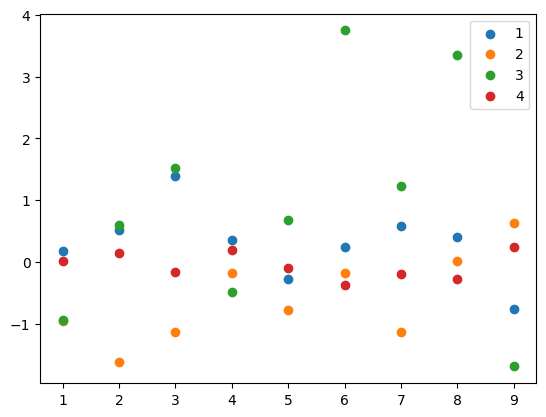

In [220]:
i =0
for c in means["kmeans"]:
    i+=1
    plt.scatter([range(1,10)],c,label=str(i))
    plt.legend()
    #print(c)

In [228]:
s=0
for cl in km_labels:
    s+= QF(sdf[sdf.index.isin(cl)].mean().tolist(),sdf[sdf.index.isin(cl)].values.tolist())
print("kmeans",s)

kmeans 334.8914259341926
